# Media Mix Modeling for Acquisition: Model Evaluation - v1

1. Pooling Type: ***Partial***
2. Normalization: 
 - target_norm_method=2 --> ***per dma across target normalization***
 - media_norm_method=2 --> ***per dma across media normalization***

## 1. Use Pre-Processed Media Mix Data

In [1]:
### 0. Load Required Packages and Utility Functions
defaultW = getOption("warn") 
options(warn = -1) 
options(scipen = 10000)
suppressPackageStartupMessages({
    library(rstan)
    options(mc.cores = parallel::detectCores())
    rstan_options(auto_write = TRUE)
    Sys.setenv(LOCAL_CPPFLAGS = '-march=native')

    library(brms)
    library(lme4)
    library(here)
    library(tidyverse)
    library(tidybayes)
    library(bayesplot)
    library(lubridate)
    library(zoo)
})

source("Packages/Utility_Functions_MMM.R")



### 1. Use Pre-Processed Media Mix Data
##SBC - Approach 2

#load("RData/data_XyZ_adj_45.RData")
#load("RData/data_XyZ_adj_0.7.RData")
#load("RData/data_XyZ_adj_0.5.RData")

#load("RData/pp_MMM_adj_SBC_45.RData")
#load("RData/pp_MMM_adj_SBC_0.7.RData")
#load("RData/pp_MMM_adj_SBC_0.5.RData")

##SBC - Approach 2 - beta restricted
#load("RData/data_XyZ_adj_45_beta_res.RData")
#load("RData/pp_MMM_adj_SBC_45_beta_res.RData")


##SBC - Approach 3
load("RData/data_XyZ_ts_comp.RData")
load("RData/pp_MMM_ts_comp_xy995.RData")

## 2. Create Stan Data

In [2]:
### 2. Create Stan Data - Approach 3
#------------------------------------------------------------#
# Target:              True Gross Adds                       #
# Media Normalization: across dma per media normalization    #
#------------------------------------------------------------#
var_target      = 'gross_add_true'
var_control18   = c('seasonality_gross_add_true','AR1', 'tp_price','comp_index','inflation','weather1','weather3','competitive_offer','istart_offer','financial_offer','price_for_life','covid_emergency','big_holiday','summer_promo_end','snow','covid_daily_confirmed_cases','anom_opt')
var_control19   = c('seasonality_gross_add_true','AR1', 'price_hybrid','competition','inflation','weather1','weather3','competitive_offer','istart_offer','financial_offer','price_for_life','covid_emergency','big_holiday','summer_promo_end','snow','covid_daily_confirmed_cases')
# Print media variables
print_media_names(pp_MMM_ls = pp_MMM_ts_comp_xy995)



#------------------------------------------------------------#
# Partial Pooling                                            #
#------------------------------------------------------------#
# One can choose one of ("partial", "no", "complete") pooling types.
pooling_type   = "partial"

# Choose the beginning of test date.
test_date      = NULL      

# Specify prior values for media parameters
# Provide (1) median/mean and (2) standard deviation of each of the media parameters
media_priors_00   = list(median = rep(0, 10), std = rep(1, 10))
media_priors_10   = list(median = rep(0.10, 10), std = rep(1, 10))
media_priors_20   = list(median = rep(0.20, 10), std = rep(1, 10))
media_priors_30   = list(median = rep(0.30, 10), std = rep(1, 10))






Note: Selected Media Mix Variables for Modeling
 [1] "tv_spend"                    "dm_spend"                   
 [3] "paid_search_spend_brand"     "paid_search_spend_unbranded"
 [5] "display_spend"               "radio_spend"                
 [7] "video_spend"                 "print_spend"                
 [9] "social_spend"                "audio_spend"                


In [3]:
##For Approach 3 - 0.45 - restricted beta
stan_data_PP_44_10_C19      = make_stan_data_MMM(pp_MMM_ls          = pp_MMM_ts_comp_xy995,
                                       target_norm_method = 4,
                                       media_norm_method  = 4,
                                       var_target         = var_target,
                                       var_control        = var_control19,
                                       df_geo             = NULL,
                                       test_date          = test_date,
                                       pooling_type       = pooling_type,
                                       media_priors       = media_priors_10)


Note: How to Make Stan Data
1. Use Preprocessed Media Mix Data
 - Media mix data should be preprocessed by `preprocess_MMM()`.

2. Choose a Target Normalization Method
 - target_norm_method=4 --> across dma across target normalization

3. Choose a Media Normalization Method
 - media_norm_method=4 --> across dma across media normalization

4. Create Train/Test Data
 - The entire data will be used for model calibration as follows:

|Sample_Type | Sample_Size| Sample_Pct| N_Period|First_Date |Last_Date  |
|:-----------|-----------:|----------:|--------:|:----------|:----------|
|All         |        5850|        100|      195|2017-12-31 |2021-09-19 |
|Train       |        5850|        100|      195|2017-12-31 |2021-09-19 |
|Test        |           0|          0|        0|NA         |NA         |

5. Specify Priors for Media Parameters
 - The user-defined priors will be used as follows:

|Media_Mix                   |Pooling_Type |Distribution | Median|  Mean|  Mode| STD|
|:--------------

## 3. Diagnose MCMC

In [5]:
#################################################################################
### 4. Model Evaluation                                                       ###
###                                                                           ###
### (1) Use `diagnose_MCMC`.                                                  ###
### (2) Use `evaluate_MMM`.                                                   ###
###                                                                           ###
#################################################################################
# load("RData/stan_fit_CP.RData")

##Approach 2 - beta unrestricted

load("model_fits/fit_PP_44_10_C19_xy995_beta_res_Appr3_45.RData")


### 1. Diagnose the Stan Fit
#------------------------------------------------------------#
# MCMC Conditions                                            #
#------------------------------------------------------------#
num_chains     = 4
num_iterations = 2000
num_warmups    = 1000
num_treedepth  = 15
stanfit_44_10_C19        = fit_PP_44_10_C19_xy995_beta_res_Appr3_45



DIA_PP_44_10_C19   = diagnose_MCMC(var_target    = var_target,
                         stanfit       = stanfit_44_10_C19,
                         chains        = num_chains,
                         iter          = num_iterations,
                         warmup        = num_warmups,
                         max_treedepth = num_treedepth)







MCMC Diagnostics
------------------------------------------------------------
0. Target: gross_add_true 

1. Divergence
 - The total number of iterations: 4,000 
 - Iterations with divergences   : 0 
 - Divergence %                  : 0.00% 



`summarise()` has grouped output by 'warmup_period'. You can override using the `.groups` argument.



2. Treedepth
 - The total number of iterations: 4,000 
 - Iterations with max treedepth : 0 
 - Max treedepth %               : 0.00% 

3. n_eff, Effective Sample Size
 - The number of model parameters: 6,731 
 - The evaluation criterion      : n_eff > 1% of iterations
 - Parameters with the problem   : 0 
 - Small n_eff parameter %       : 0.00% 

4. Rhat, Potential Scale Reduction Factor
 - The number of model parameters: 6,731 
 - The evaluation criterion      : Rhat < 1.05
 - Parameters with the problem   : 0 
 - Poor mixing parameter %       : 0.00% 



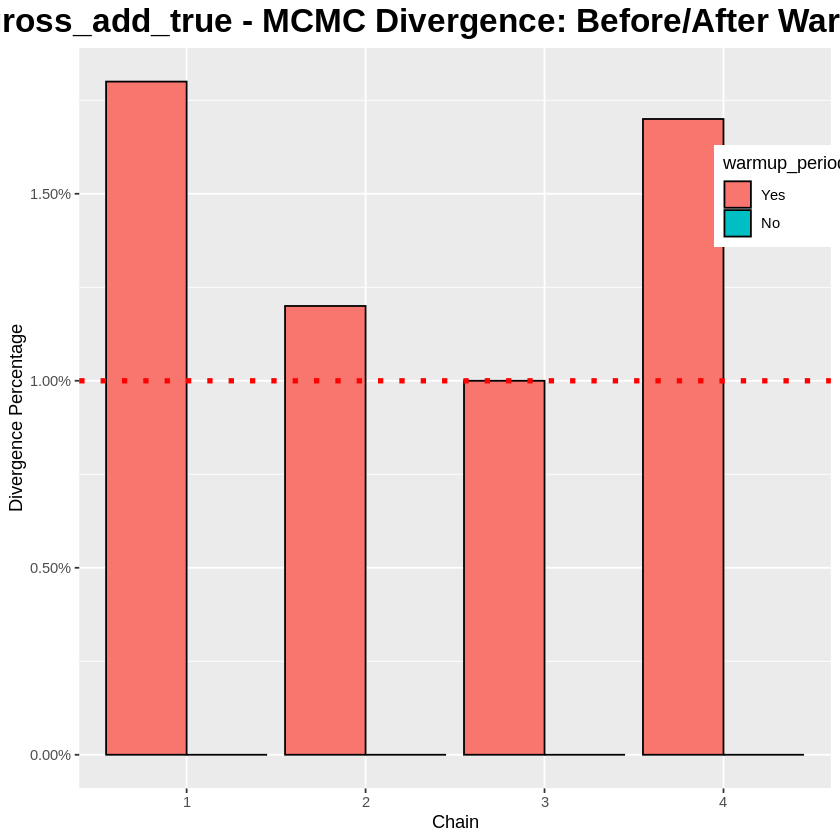

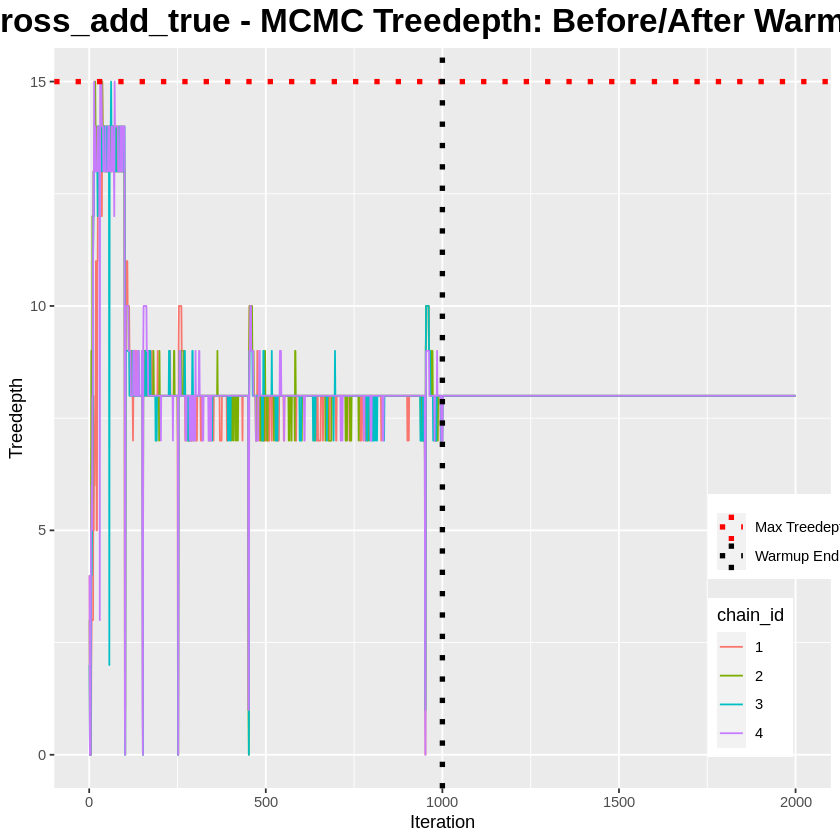

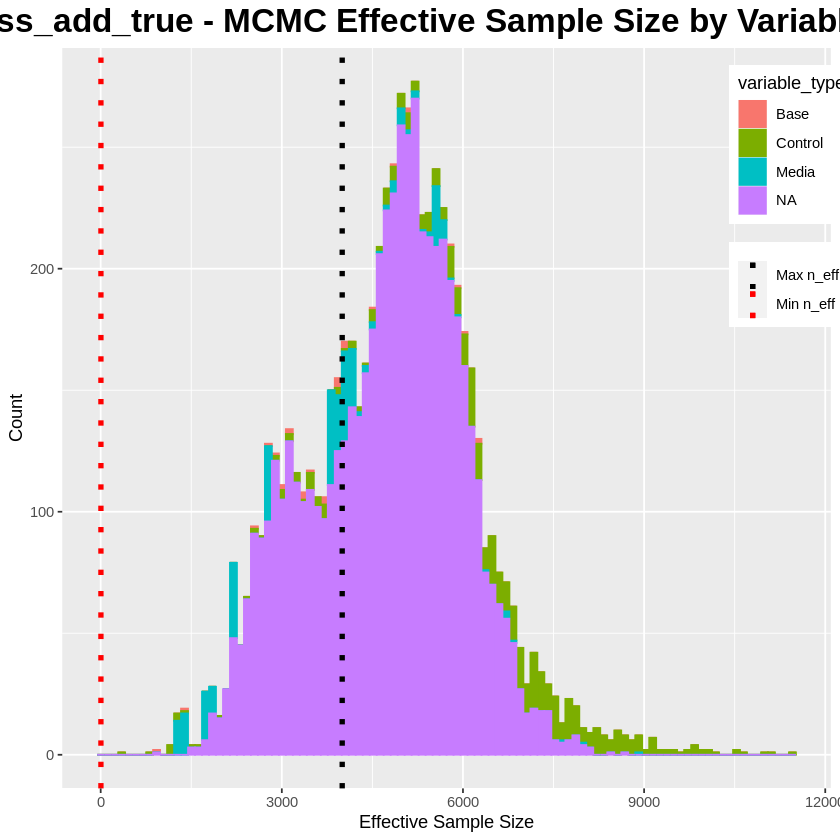

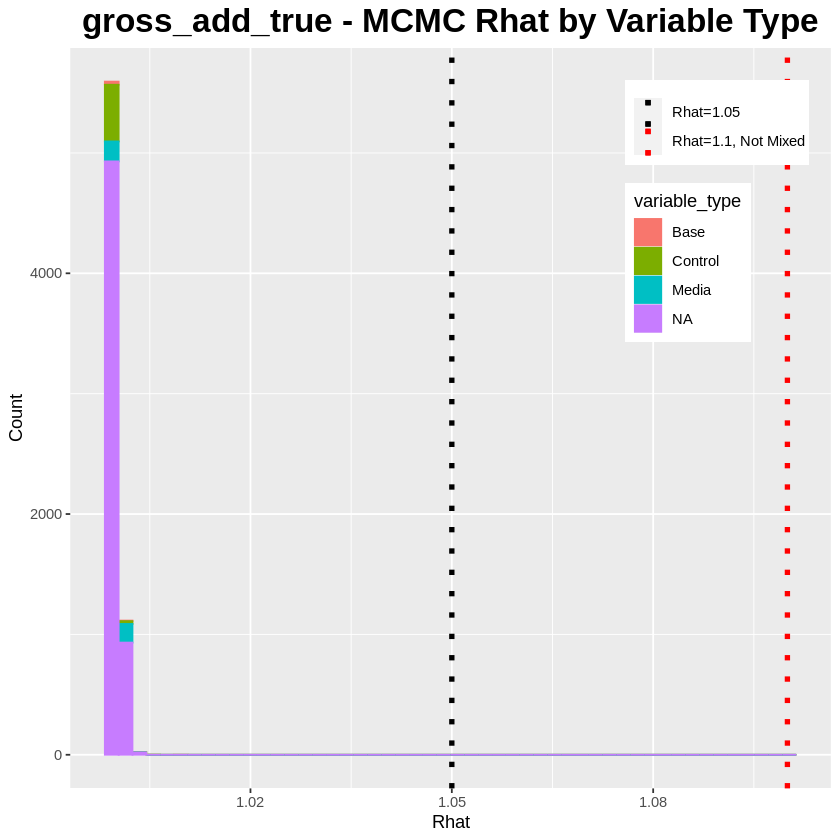

In [6]:
##SBC - Appr3 - beta restricted - 0.45
DIA_PP_44_10_C19$divergence
DIA_PP_44_10_C19$treedepth
DIA_PP_44_10_C19$n_eff
DIA_PP_44_10_C19$Rhat

## 4. Evaluate MMM

In [7]:
### Partial Pooling - 44 - C19 - 10 - Approach 3 - 0.45
df_XyZ         = data_XyZ_ts_comp
pp_MMM_ls      = pp_MMM_ts_comp_xy995
standata       = stan_data_PP_44_10_C19
stanfit        = fit_PP_44_10_C19_xy995_beta_res_Appr3_45
media_positive = TRUE
#pooling_type   = "partial"

t0       = Sys.time()
EVA_PP_44_10_C19   = evaluate_MMM(df_XyZ         = df_XyZ,
                        pp_MMM_ls      = pp_MMM_ls,
                        standata       = standata,
                        stanfit        = stanfit,
                        media_positive = media_positive,
                        pooling_type_media   = pooling_type)

t1       = Sys.time()
Runtime  = t1 - t0
print(Runtime)

# Time difference of 19.10957 mins

`summarise()` has grouped output by '.draw', 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw', 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw', 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by '.draw'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group', 'variable_id', 'variable_name'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.

`summarise()` has grouped output by 'group'. You can override using the `.groups` argument.

`summarise(

ERROR: Error: cannot allocate vector of size 3.0 Gb


### Media Parameters

In [ ]:
#SBC Approach 3 - 0.45 - beta restricted
EVA_PP_44_10_C19$geo_para_stat$media %>%
filter(variable == 'paid_search_spend_brand')

### Model Fits

In [ ]:
##Approach 3 - beta restricted
EVA_PP_44_10_C19$y_fitted_stat$all

In [ ]:
time_df <- data_XyZ_ts_comp %>%
ungroup() %>%
group_by(dma) %>%
mutate(time = row_number(period)) %>%
ungroup() %>%
select(period,time) %>%
distinct()

In [ ]:
ts_data <- EVA_PP_44_10_C19$y_fitted_stat$ts %>%
filter(group%in%c('Optimum','Suddenlink','Altice')) %>%
left_join(time_df) %>%
select(period,everything())

In [ ]:
save(ts_data,file = 'RData/Pred_vs_Actual_TS_data.RData')

In [ ]:
source('Packages/point_est.R')

In [ ]:
##Approach 3 - Restricted beta
point_metrics(EVA_PP_44_10_C19)

### Media Contribution

In [10]:
##Approach 3 - beta restricted
EVA_PP_44_10_C19$media_C_stat

group,variable_id,variable_name,N,Mean,Median,StdDev,Min,Max,Range,⋯,q005,q01,q015,q025,q075,q085,q09,q095,q0975,q099
<fct>,<dbl>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Altice,0,media_contribution_y,4000,9.98266762,9.990355990,0.30682002,8.4016239021,11.1545596,2.7529357,⋯,9.4858721343,9.6156116277,9.6919587016,9.795165498,10.16993965,10.27283367,10.35032636,10.48211749,10.6150745,10.7474396
Altice,1,tv_spend,4000,65.17269079,65.299723522,1.57913772,57.2065378895,69.5512867,12.3447489,⋯,62.3329859122,63.1204540934,63.5729029343,64.261963302,66.26923137,66.75453429,67.07564681,67.48533102,67.8450538,68.2795628
Altice,2,dm_spend,4000,5.23199564,5.017374303,0.95122811,3.6963520538,12.3415256,8.6451735,⋯,4.1297126305,4.2698893215,4.3803199060,4.567825716,5.68210622,6.11981819,6.46194006,7.04207163,7.5761249,8.2342924
Altice,3,paid_search_spend_brand,4000,22.14769851,22.165303145,0.86861226,17.9043630257,26.7946941,8.8903310,⋯,20.7176017945,21.0710100379,21.2850517017,21.607167557,22.68206346,22.97927807,23.18090591,23.52265757,23.8841884,24.3210337
Altice,4,paid_search_spend_unbranded,4000,3.10416773,2.848515981,1.24736922,1.0789370520,13.1854304,12.1064933,⋯,1.6103196212,1.7898339380,1.9299102008,2.204304291,3.69622278,4.25998674,4.71164025,5.51073127,6.3038626,7.2371018
Altice,5,display_spend,4000,2.12103613,1.972647362,0.69305018,1.0513515235,7.9304433,6.8790918,⋯,1.3100327128,1.4057221603,1.4826505369,1.626002507,2.46085068,2.76695868,3.02952707,3.45792567,3.8380607,4.3371571
Altice,6,radio_spend,4000,0.52113369,0.497569426,0.11945863,0.3109847354,1.8865458,1.5755610,⋯,0.3774656368,0.3964954653,0.4126107736,0.438050754,0.57831598,0.63133743,0.67168671,0.74075697,0.8047978,0.9068973
Altice,7,video_spend,4000,0.74422645,0.613175255,0.48861662,0.1722095444,6.0467227,5.8745132,⋯,0.2679854090,0.3089790744,0.3451094198,0.413696140,0.91355150,1.14646708,1.33557287,1.70024079,2.0215430,2.5088724
Altice,8,print_spend,4000,0.25537890,0.157823792,0.26067201,0.0071978241,1.7434465,1.7362487,⋯,0.0299014109,0.0415303295,0.0517837690,0.075229872,0.34293891,0.48956061,0.62453366,0.83253622,0.9788559,1.2091580


### MCMC_objs

In [11]:
MCMC_objs <- EVA_PP_44_10_C19$MCMC_objs

In [12]:
MCMC_objs$eval_metrics <- EVA_PP_44_10_C19$y_fitted_stat$all

In [13]:
save(MCMC_objs,file = 'MCMC_objs/MCMC_objs_EVA_PP_44_10_C19_xy995_appr3_beta_res.rda')

### Posterior distributions

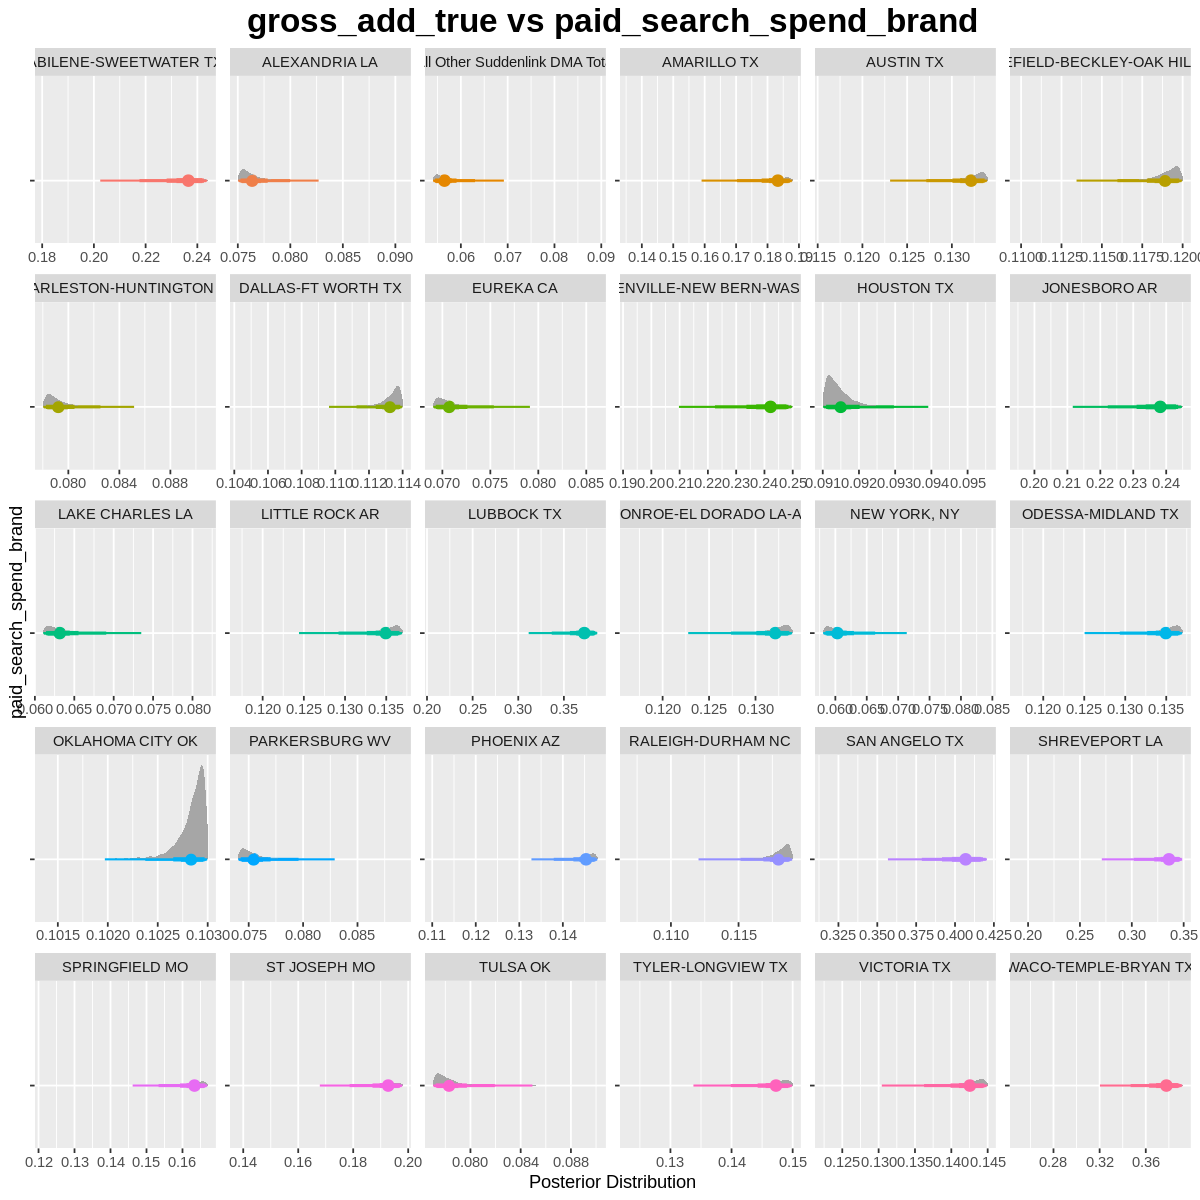

In [14]:
##Approach 3
options(repr.plot.width=10, repr.plot.height = 10) 
EVA_PP_44_10_C19$geo_para_plot$media$paid_search_spend_brand

In [15]:
PP_44_10_C19_appr3_45_beta_res_pop_para_stat = EVA_PP_44_10_C19$pop_para_stat$all
PP_44_10_C19_appr3_45_beta_res_geo_para_stat = EVA_PP_44_10_C19$geo_para_stat$all

In [16]:
save(PP_44_10_C19_appr3_45_beta_res_pop_para_stat,PP_44_10_C19_appr3_45_beta_res_geo_para_stat,file = 'Optimization_results/Optimizer_PP_44_10_C19_appr3_45_beta_res_xy995.RData')